In [ ]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import arviz


# Load the data set
data = pd.read_csv('https://raw.githubusercontent.com/.../AB_Test_New.csv')

In [ ]:
print(data.shape)
data.head()

(150, 3)


,Unnamed: 0,number_of_visits,revenue
0,0,27,153.18
1,1,63,192.99
2,2,93,175.86
3,3,98,150.52
4,4,58,169.82


In [ ]:
data_new = data.iloc[:,1:]
print(data_new.shape)
data_new.head()

(150, 2)


,number_of_visits,revenue
0,27,153.18
1,63,192.99
2,93,175.86
3,98,150.52
4,58,169.82


In [ ]:
X = data_new["number_of_visits"]
Y = data_new["revenue"]

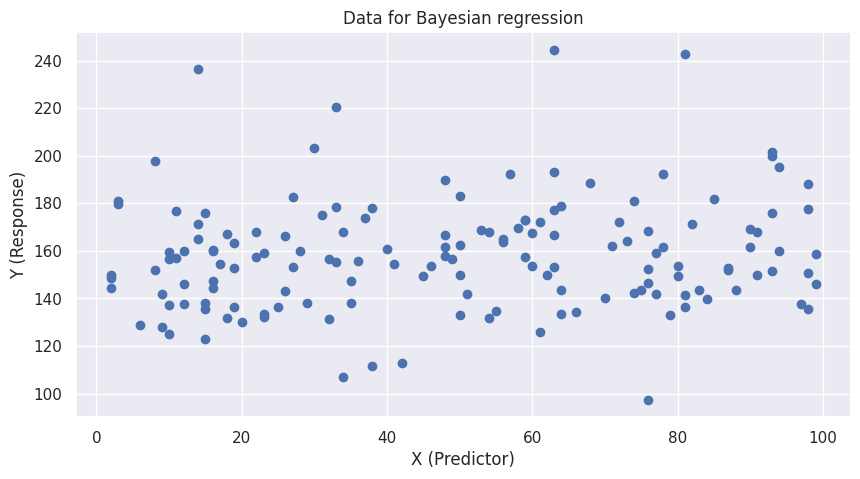

In [ ]:
# Create a visualisation to view the data points.

# Set the style of the figures.
sns.set(style="darkgrid")

# Specify the plot size and type.
plt.figure(figsize=(10, 5))
plt.scatter(X, Y)

# Specify the labels and title.
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Response)')
plt.title('Data for Bayesian regression')

# View the plot.
plt.show()

In [ ]:
# Create a Bayesian linear regression model using PyMC.
with pm.Model() as linear_model:
    # Define the priors.
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Display the expected value of the outcome.
    mu = alpha + beta * X

    # Display the likelihood (sampling distribution) of the observations.
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [ ]:
# Use PyMC's sampling method to draw samples from the posterior (probability distribution).
with linear_model:
    # Draw 3,000 samples from the posterior.
    trace = pm.sample(3000)

# Summarise the trace.
pm.summary(trace).round(2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,144.97,2.44,140.26,149.50,0.04,0.03,3219.0,2923.0,1.0
beta,0.23,0.04,0.15,0.31,0.00,0.00,3085.0,2564.0,1.0
sigma,14.99,0.45,14.11,15.81,0.01,0.01,3333.0,3218.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


<Figure size 1200x1000 with 0 Axes>

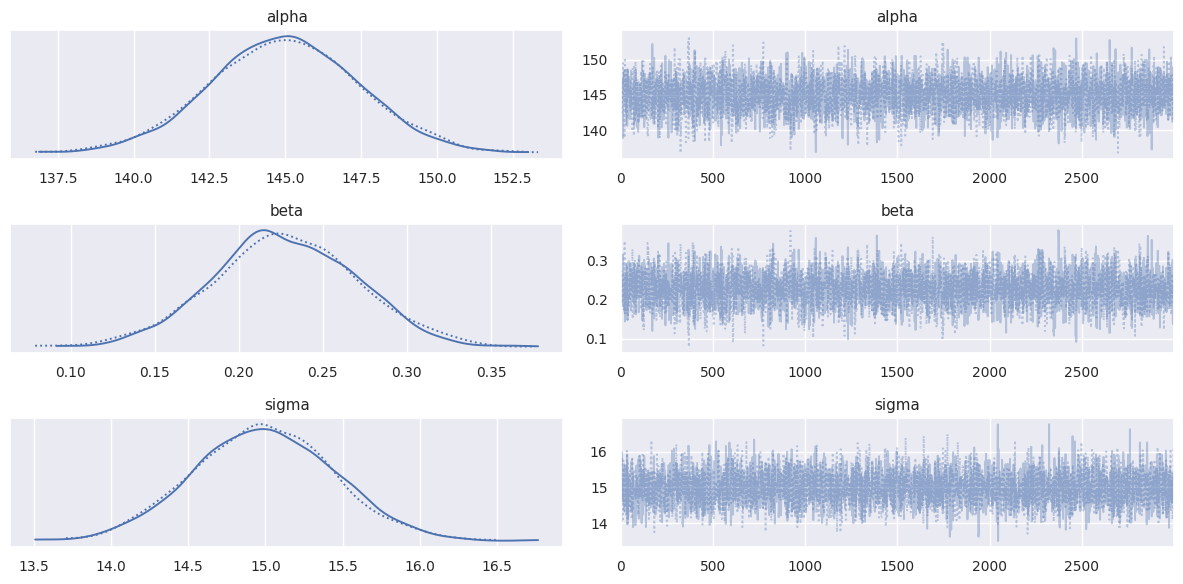

In [ ]:
# Visualise the posterior distributions and model predictions.
# This step is crucial in understanding the variability and uncertainty in our parameter estimates.
plt.figure(figsize=(12, 10))
pm.plot_trace(trace)

# Add the plt.tight_layout() for accessibility.
plt.tight_layout()
plt.show()

# Reflection

The mean of alpha, beta and sigma all fall between 3% amd 97% of their high density interval. Furthermore, r_hat are all 1, indicating the simulations converge to the same distribution. Therefore they confirm the validity of the model.

From the model, we infer that since (mu = alpha + beta * X),

mu = 144.97	+ 0.23 X
 - The expected value of Y when X is 0 is 144.97. For each unit of X increase, Y increases by 0.23.

>